In [1]:
!pip install shap

In [3]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import shap

In [5]:
dados = pd.read_csv("diabetes.csv")

In [6]:
dados.rename(columns={'Pregnancies': 'gestacoes', 'Glucose': 'glicose', 'BloodPressure': 'pressao_arterial'}, inplace=True)
dados.rename(columns={'SkinThickness': 'espessura_pele', 'Insulin': 'insulina', 'BMI': 'imc'}, inplace=True)
dados.rename(columns={'DiabetesPedigreeFunction': 'predisposicao_genetica_diabetes', 'Age': 'idade', 'Outcome': 'diabetes'}, inplace=True)

In [7]:
dados.head()

,gestacoes,glicose,pressao_arterial,espessura_pele,insulina,imc,predisposicao_genetica_diabetes,idade,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
dados.describe()

,gestacoes,glicose,pressao_arterial,espessura_pele,insulina,imc,predisposicao_genetica_diabetes,idade,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

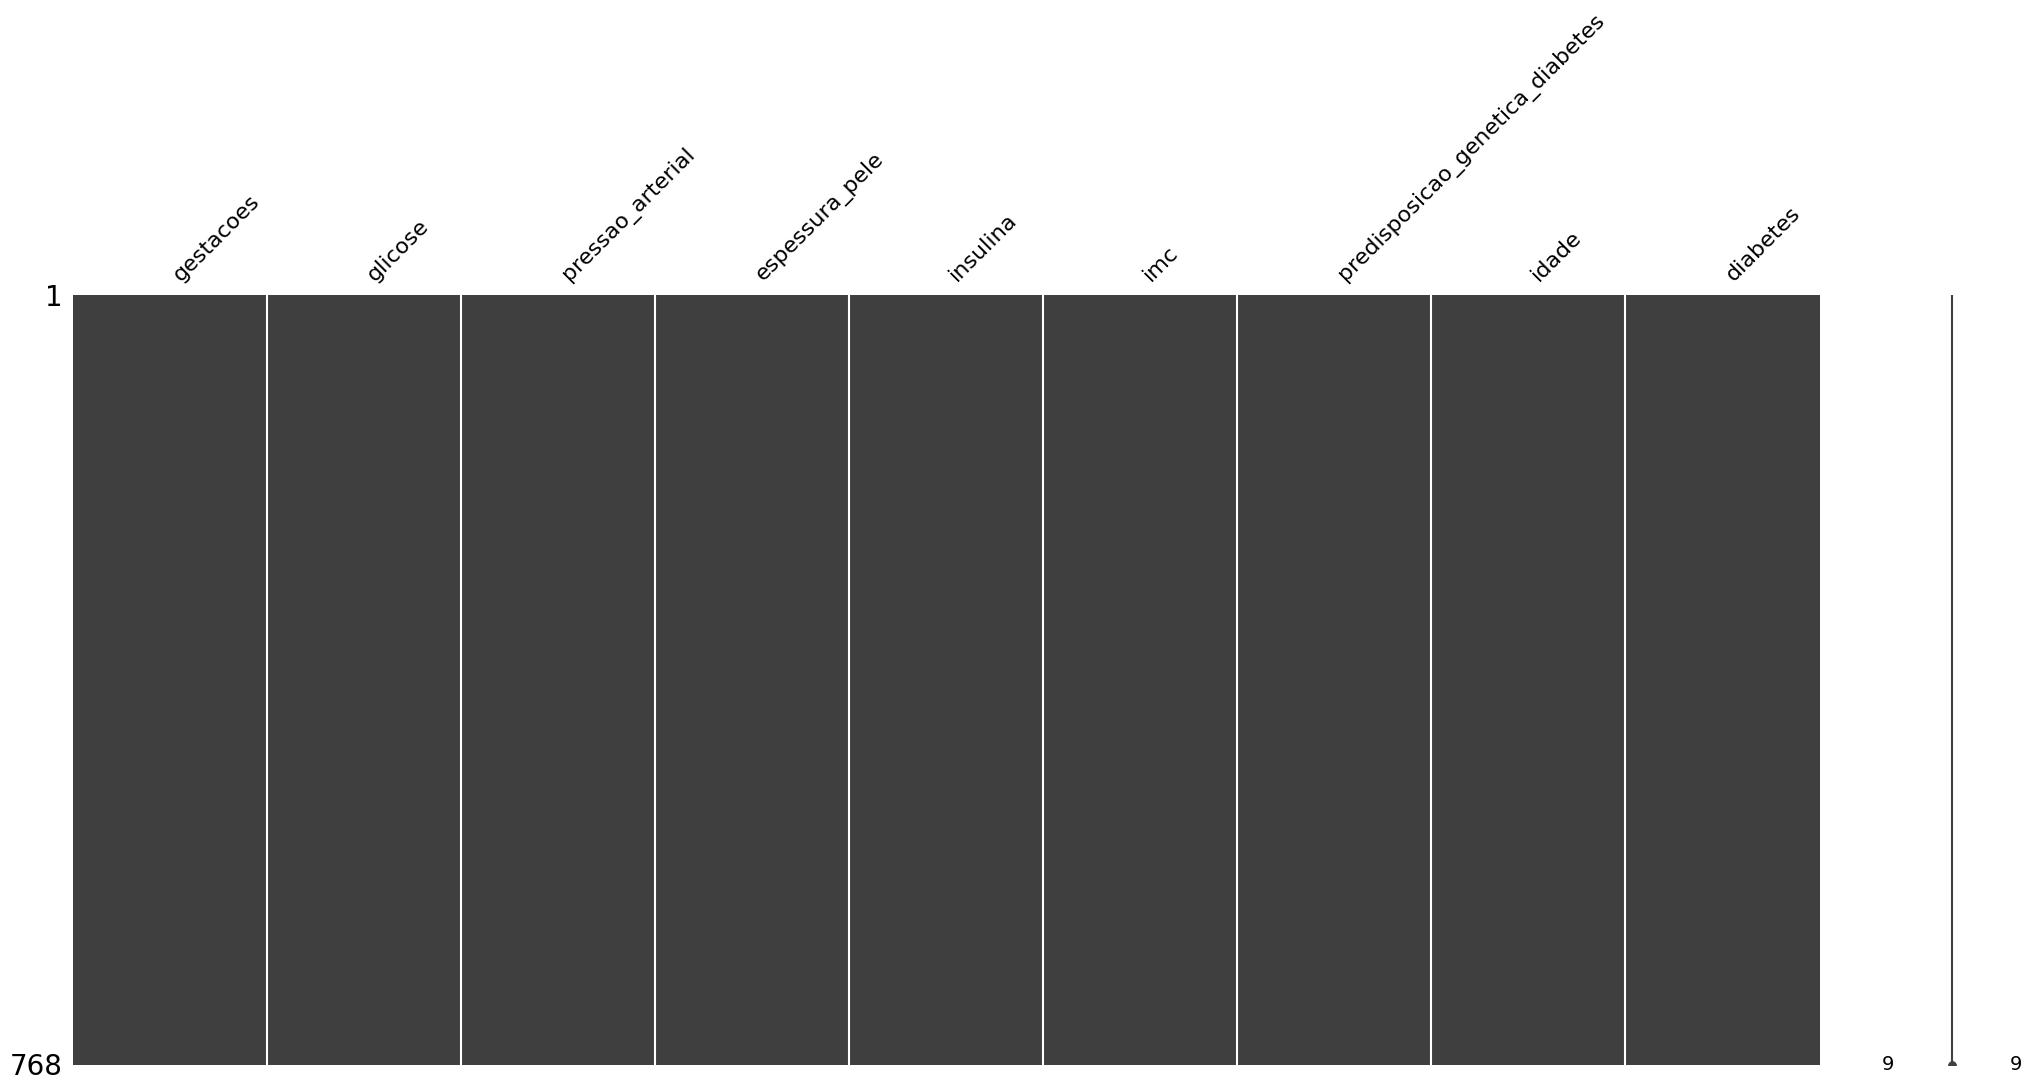

In [9]:
msno.matrix(dados)

<Axes: xlabel='glicose', ylabel='Count'>

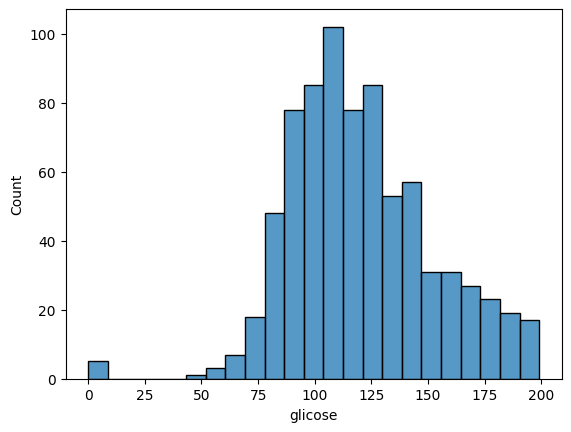

In [10]:
sb.histplot(data = dados, x = "glicose")

<Axes: >

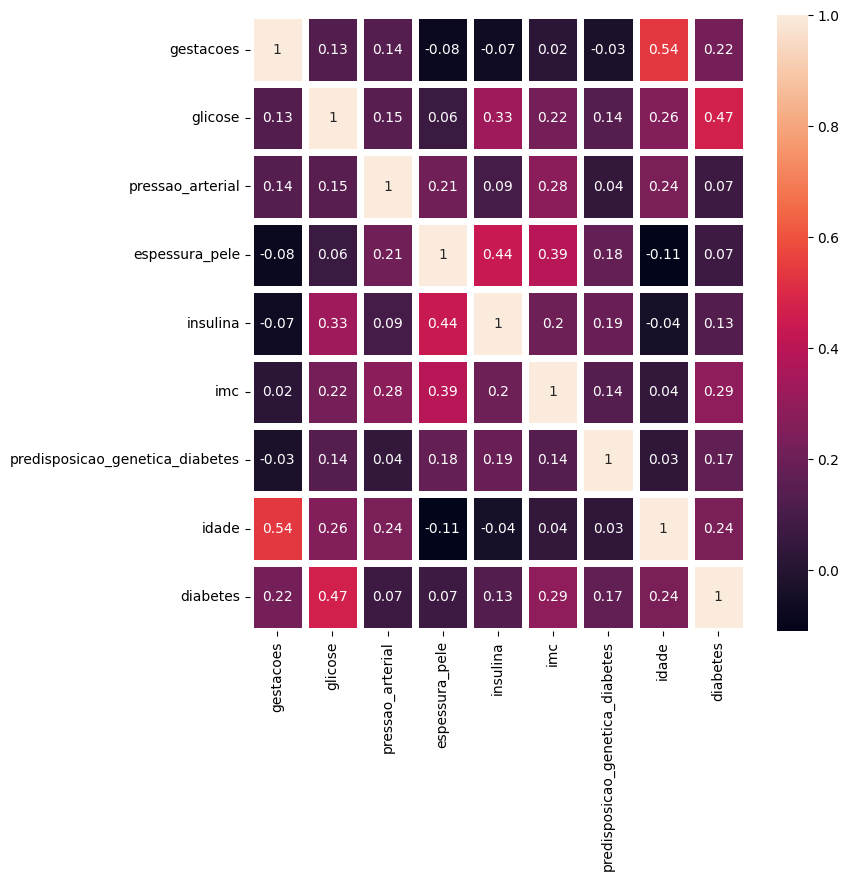

In [11]:
matriz_correlacao = dados.corr().round(2)
fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(data=matriz_correlacao, annot=True, linewidths=5, ax = ax)

In [12]:
x = dados[["gestacoes", "glicose", "insulina", "imc", "predisposicao_genetica_diabetes","idade"]]
y = dados["diabetes"]

In [14]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 13)

In [16]:
erros = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_treino, y_treino)
    predicao_i = knn.predict(x_teste)
    erros.append(np.mean(predicao_i != y_teste))

Text(0, 0.5, 'Erro médio')

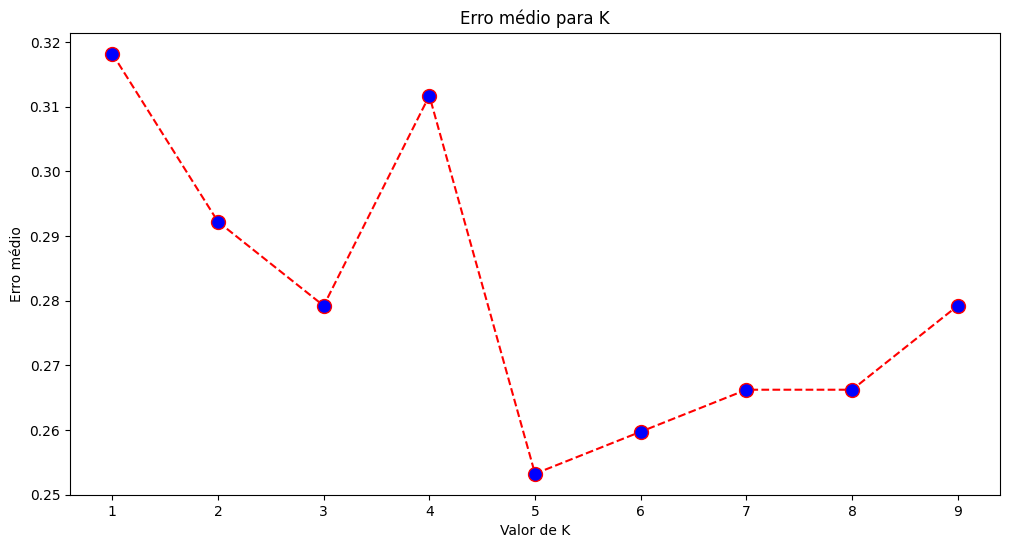

In [17]:
plt.figure(figsize=(12,6))
plt.plot(range(1,10), erros, color = "red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize = 10)
plt.title("Erro médio para K")
plt.xlabel("Valor de K")
plt.ylabel("Erro médio")

In [18]:
modelo_classificador_knn = KNeighborsClassifier(n_neighbors = 5)
modelo_classificador_knn.fit(x_treino, y_treino)
predicao_knn_y = modelo_classificador_knn.predict(x_teste)

In [21]:
aruracia_knn = accuracy_score(y_true = y_teste, y_pred = predicao_knn_y)
print("Acurácia KNN: ", aruracia_knn)

Acurácia KNN:  0.7467532467532467


In [22]:
svm = Pipeline(
    [
        ("linear_svc", LinearSVC(C = 1))
    ]
)

In [23]:
svm.fit(x_treino, y_treino)

,steps,"[('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1
,multi_class,'ovr'
,fit_intercept,True


In [24]:
predicao_svm_y = svm.predict(x_teste)

In [25]:
aruracia_svm = accuracy_score(y_true = y_teste, y_pred = predicao_svm_y)
print("Acurácia SVM: ", aruracia_svm)

Acurácia SVM:  0.7922077922077922


Text(70.72222222222221, 0.5, 'Dados Reais')

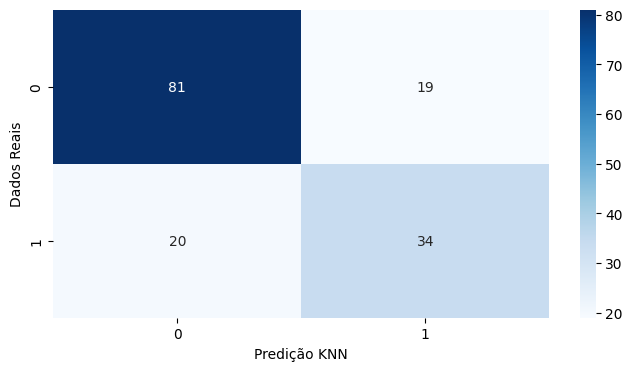

In [26]:
matriz_confusao_knn = confusion_matrix(y_teste, predicao_knn_y)
plt.figure(figsize = (8,4))
sb.heatmap(matriz_confusao_knn, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predição KNN")
plt.ylabel("Dados Reais")

Text(70.72222222222221, 0.5, 'Dados Reais')

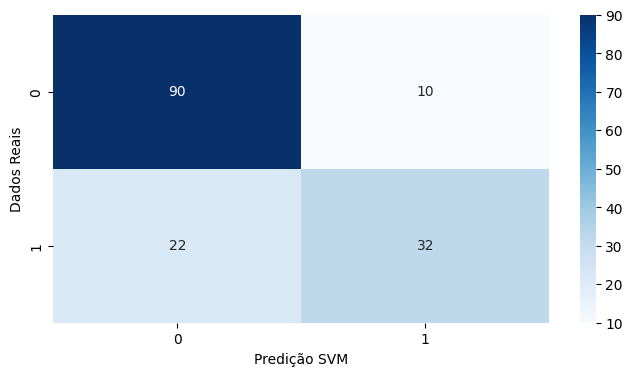

In [27]:
matriz_confusao_svm = confusion_matrix(y_teste, predicao_svm_y)
plt.figure(figsize = (8,4))
sb.heatmap(matriz_confusao_svm, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predição SVM")
plt.ylabel("Dados Reais")

In [28]:
print("Resultado KNN")
print(classification_report(y_teste, predicao_knn_y))
print("Resultado SVM")
print(classification_report(y_teste, predicao_svm_y))

Resultado KNN
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       100
           1       0.64      0.63      0.64        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

Resultado SVM
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.76      0.59      0.67        54

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [31]:
explainer = shap.KernelExplainer(modelo_classificador_knn.predict_proba, x[:100])

In [32]:
shap_values = explainer.shap_values(x_teste[:100])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 57.13it/s]


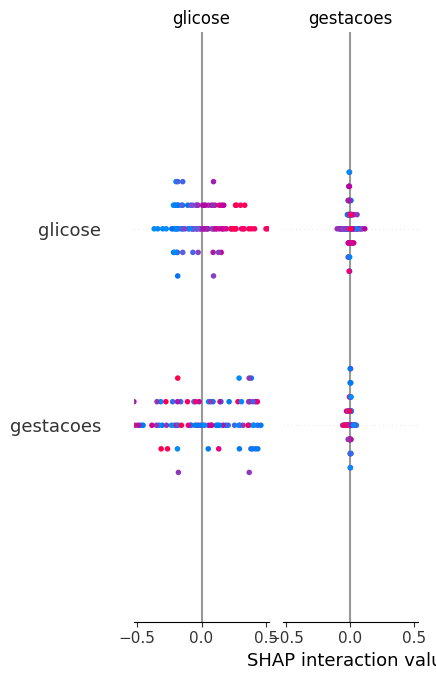

In [33]:
shap.summary_plot(shap_values[:], x_teste[:100], feature_names=x.columns)